In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv('./LSTM-Multivariate_pollution.csv')

data.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [17]:
data.columns

Index(['date', 'pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd',
       'snow', 'rain'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB


In [19]:
data.drop('date', axis=1, inplace=True)

label_encoder = LabelEncoder()
data['wnd_dir'] = label_encoder.fit_transform(data['wnd_dir'])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

In [20]:
def create_sequences(data, target_columns, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data.iloc[i:i+n_steps].values)
        y.append(data.loc[i+n_steps, target_columns].values)
    return np.array(X), np.array(y)

n_steps = 12
X, y = create_sequences(scaled_data, target_columns=['temp', 'wnd_spd'], n_steps=n_steps)
X.shape, y.shape

((43788, 12, 8), (43788, 2))

In [21]:
model = Sequential()

model.add(LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(2))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,902 (46.49 KB)

 Trainable params: 11,902 (46.49 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='mse', metrics=['r2_score'])

history = model.fit(X, y, epochs=32, validation_split=0.2, batch_size=64)


Epoch 1/32
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0202 - r2_score: 0.2784 - val_loss: 0.0012 - val_r2_score: 0.9102
Epoch 2/32
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0011 - r2_score: 0.9208 - val_loss: 8.0641e-04 - val_r2_score: 0.9258
Epoch 3/32
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8.5219e-04 - r2_score: 0.9328 - val_loss: 7.6915e-04 - val_r2_score: 0.9133
Epoch 4/32
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.9479e-04 - r2_score: 0.9268 - val_loss: 6.1158e-04 - val_r2_score: 0.9350
Epoch 5/32
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.6971e-04 - r2_score: 0.9413 - val_loss: 5.4664e-04 - val_r2_score: 0.9436
Epoch 6/32
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.4302e-04 - r2_score: 0.9436 - val_loss: 5.5837e-04 - val_r2_score: 0.9430
Epoch 7/32
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6.4468e-04 - r2_score: 0.9443 - val_loss: 5.4871e-04 - val_r2_score: 0.9408
Epoch 8/32
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

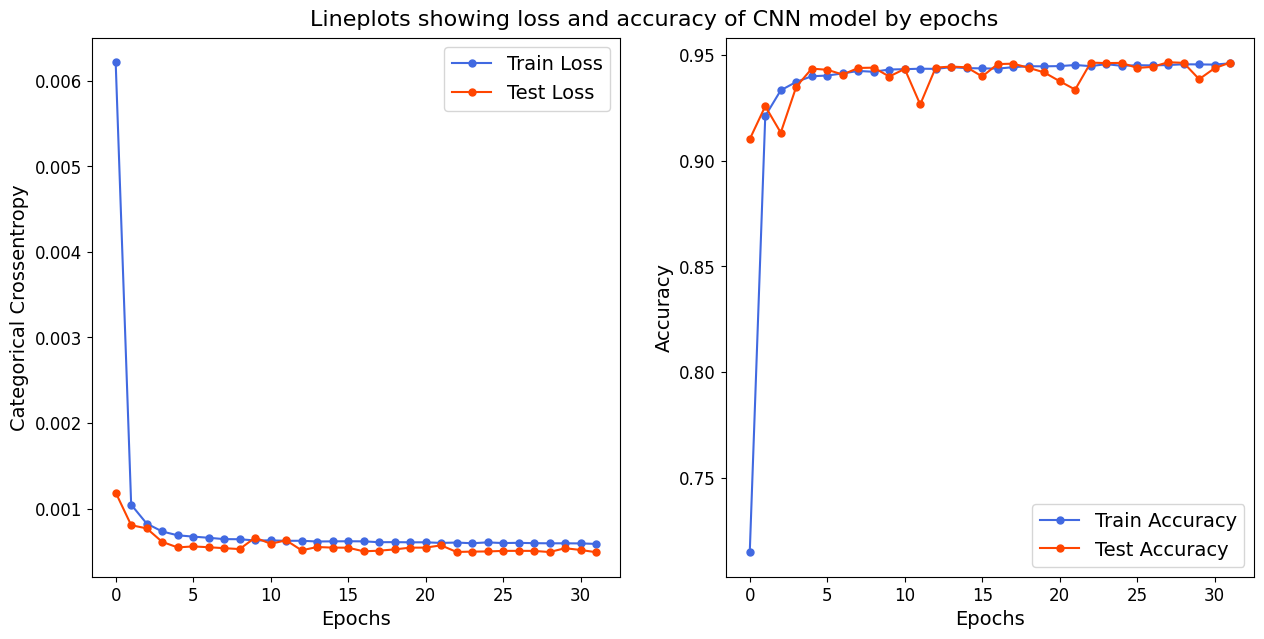

In [25]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['r2_score']
test_accuracy = history.history['val_r2_score']

# Plotting a line chart to visualize the loss and accuracy values by epochs.
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
ax = ax.ravel()
ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)
fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)